# **Netflix EDA**

**Import necessary libraries**

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

**Load DataSet**

In [20]:
data=pd.read_csv('/content/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


**Data Wrangling**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [6]:
data.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [45]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


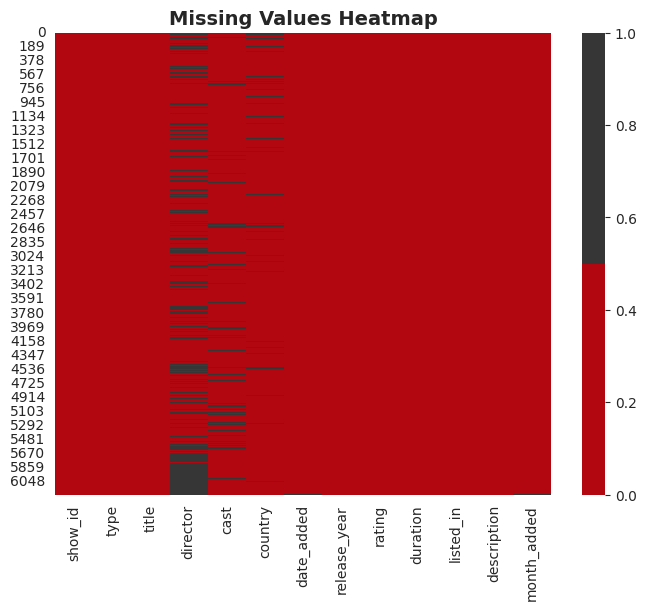

In [116]:
plt.figure(figsize=(8, 6))
cmap = sns.color_palette(["#B20710", "#363636"])
sns.heatmap(data.isnull(), cmap=cmap)
plt.title('Missing Values Heatmap', fontweight='bold', fontsize=14)
plt.show()


**1) Distribution of Release Years**

<ipython-input-115-ebaacb07d18f>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x="release_year", bins=30, palette='deep')


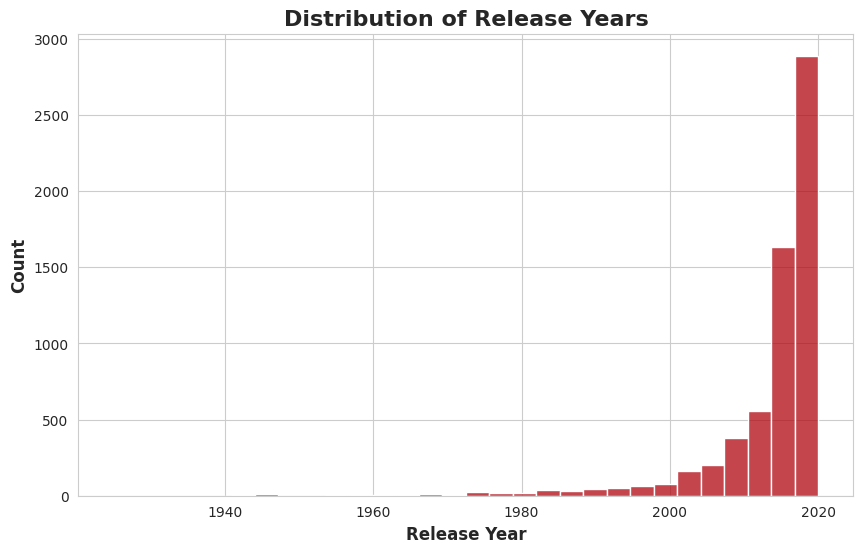

In [115]:
font_weight = 'bold'

sns.set_palette(["#B20710", "#363636"])
palette = sns.color_palette()


plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="release_year", bins=30, palette='deep')

plt.title("Distribution of Release Years", fontweight=font_weight, fontsize=16)
plt.xlabel("Release Year", fontweight=font_weight, fontsize=12)
plt.ylabel("Count", fontweight=font_weight, fontsize=12)

plt.show()

**2) Top 10 countries with most TV shows/ Movies**

In [12]:
country_counts = data['country'].value_counts().head()


In [13]:
country_counts

United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
Name: country, dtype: int64

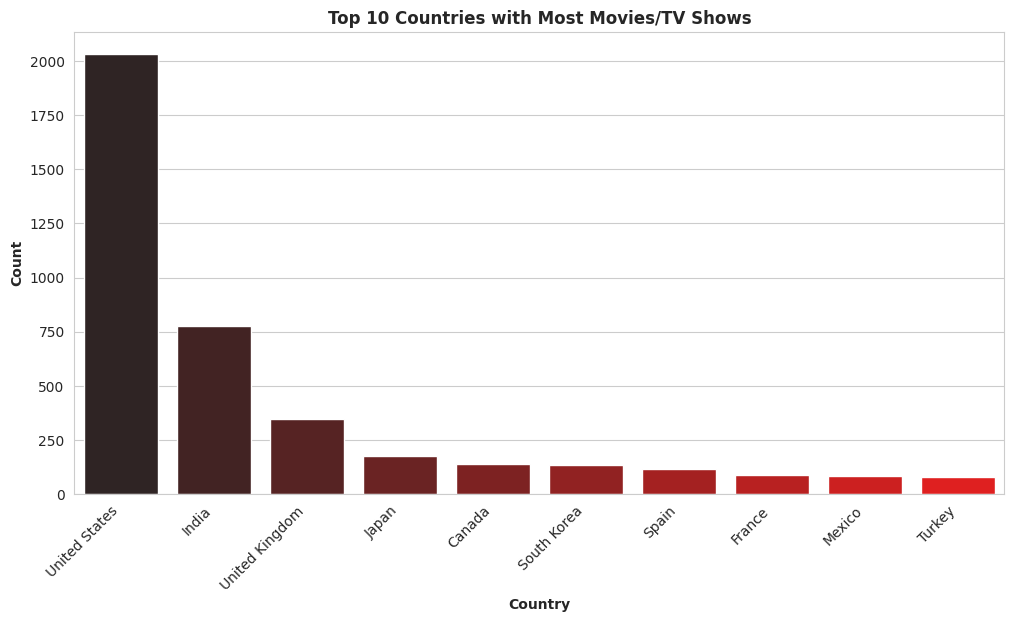

In [113]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='country', order=country_counts.index, palette=("dark:red"))


plt.title('Top 10 Countries with Most Movies/TV Shows', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

sns.set_style("whitegrid")

plt.xticks(rotation=45, ha='right')

plt.show()

**3) Proportion of Tv shows vs Movies**

In [15]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [16]:
counts = data['type'].value_counts()
counts

Movie      4265
TV Show    1969
Name: type, dtype: int64

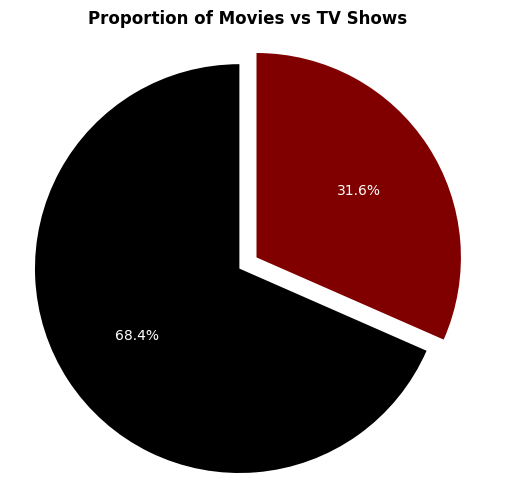

In [17]:
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, explode=[0.1, 0], autopct='%1.1f%%', startangle=90, colors=['black', 'maroon'],textprops={'color': 'white'})
plt.title("Proportion of Movies vs TV Shows", fontweight='bold')
plt.axis('equal')
plt.show()

**4) Rating Distribution**

In [47]:
rating_counts = data['rating'].value_counts()

total_count = rating_counts.sum()

below_threshold = rating_counts[rating_counts / total_count < 0.05]

In [48]:
merged_rating_counts = rating_counts.copy()
merged_rating_counts.loc['Other'] = below_threshold.sum()
merged_rating_counts = merged_rating_counts.drop(below_threshold.index)

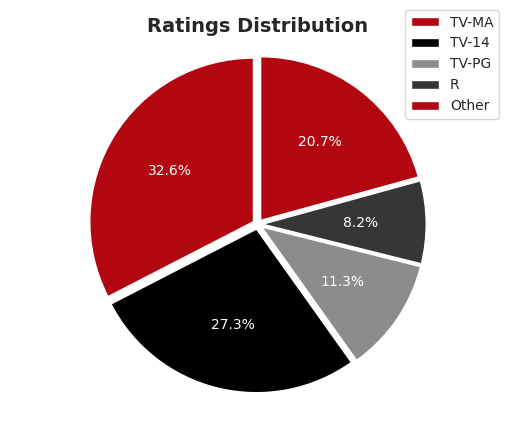

In [56]:
colors = ['#B20710', '#000000', '#8C8C8C', '#363636']

explode = [0.03] * len(merged_rating_counts)

fig, ax = plt.subplots()

wedges, labels, _ = ax.pie(merged_rating_counts.values, labels=merged_rating_counts.index, autopct='%1.1f%%',
                           startangle=90, colors=colors, explode=explode, textprops={'color': 'white'})

ax.set_title('Ratings Distribution', fontsize=14, fontweight='bold')

ax.legend(wedges, merged_rating_counts.index, loc='upper right', bbox_to_anchor=(1, 1.1))

ax.axis('equal')

ax.set_xticks([])

plt.show()

**5) Monthly upload of Tv shows / movies**

In [71]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['month_added'] = data['date_added'].dt.month


In [74]:
month_wise = data['month_added'].value_counts().sort_index()

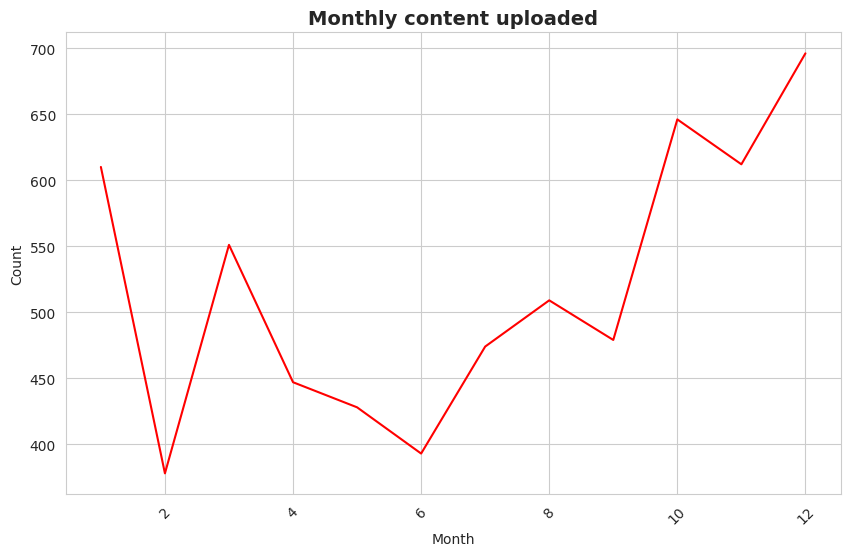

In [77]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=month_wise.index, y=month_wise.values, c = 'r')
plt.title('Monthly content uploaded', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**6) Distribution of Duration in Movies**

In [84]:
movies = data[data['type'] == 'Movie'].copy()

In [85]:
tv_shows = data[data['type'] == 'TV Show'].copy()

In [88]:
movies['duration'] = movies['duration'].astype(str).str.split(' ').str[0].astype(int)


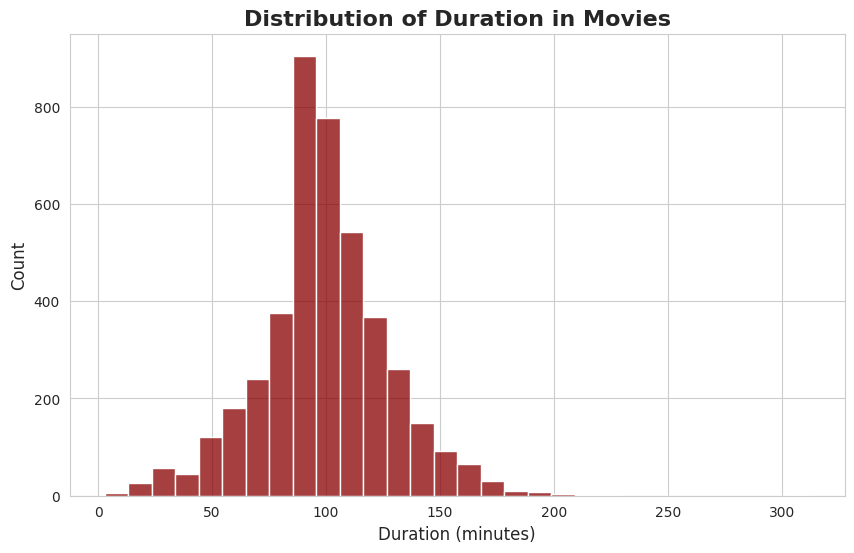

In [99]:
colors = ['#880000']

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=movies, x='duration', bins=30, color=colors[0])

plt.title("Distribution of Duration in Movies", fontsize=16,fontweight='bold')
plt.xlabel("Duration (minutes)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()


**7) Distribution of Duration in Movies**

In [100]:
tv_shows['duration'] = tv_shows['duration'].astype(str).str.split(' ').str[0].astype(int)

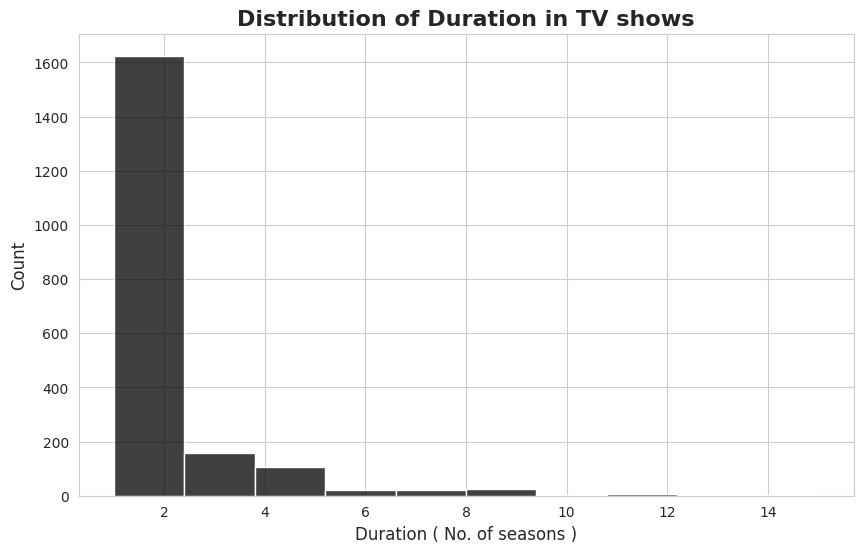

In [108]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=tv_shows, x='duration', bins=10, color='black')

plt.title("Distribution of Duration in TV shows", fontsize=16,fontweight='bold')
plt.xlabel("Duration ( No. of seasons )", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

**Done By Syed Miran**